In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import nltk

In [2]:
#check the files 
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

Airline_LogReg.ipynb
Fake.csv
News_Wordcloud.ipynb
True.csv
Untitled1.ipynb


In [3]:
#dataset importing
df_true = pd.read_csv('True.csv')

In [4]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
df_fake = pd.read_csv('Fake.csv')

In [6]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [7]:
##assign a label to files

df_true['Category'] = 1
df_fake['Category'] = 0

In [8]:
# merge the files 
df_final = pd.concat([df_true,df_fake])

In [9]:
df_final.sample(10)

,title,text,subject,date,Category
19850,BREAKING: Wikileaks Releases HILLARY’S SPEECH ...,Wow! Talk about putting our nation s security ...,left-news,"Oct 7, 2016",0
113,U.S. taxpayers rush to claim deductions under ...,NEW YORK (Reuters) - Financial advisers and ac...,politicsNews,"December 18, 2017",1
10992,New Hampshire to test broader appeal of Cruz's...,"HENNIKER, New Hampshire (Reuters) - Republican...",politicsNews,"February 3, 2016",1
4994,U.S. lawmaker's controversial tweet on immigra...,WASHINGTON (Reuters) - U.S. Representative Ste...,politicsNews,"March 13, 2017",1
121,Trump to say in security speech that China is ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"December 18, 2017",1
11053,WOW! Former Professional Boxer Wearing “Soldie...,"In 2015, former professional boxer Anthony Sma...",politics,"Apr 25, 2017",0
19628,WOW! SCRUBBED 1998 GEORGE SOROS Video Resurfac...,Knowing there were problems ahead for the Jews...,left-news,"Nov 12, 2016",0
1412,White House says Trump has confidence in Secre...,LAS VEGAS (Reuters) - U.S. President Donald Tr...,politicsNews,"October 4, 2017",1
12339,"Moscow, Cairo may sign deal on Friday to resum...",MOSCOW (Reuters) - Russia and Egypt may sign a...,worldnews,"December 14, 2017",1
1441,Chaffetz Says Congress ‘Needs To See’ Comey M...,The Trump administration is in a tailspin afte...,News,"May 16, 2017",0


In [10]:
## check all counts
df_final['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [11]:
df_final['Category'].value_counts()

0    23481
1    21417
Name: Category, dtype: int64

In [12]:
df_final.isnull().sum()

title       0
text        0
subject     0
date        0
Category    0
dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

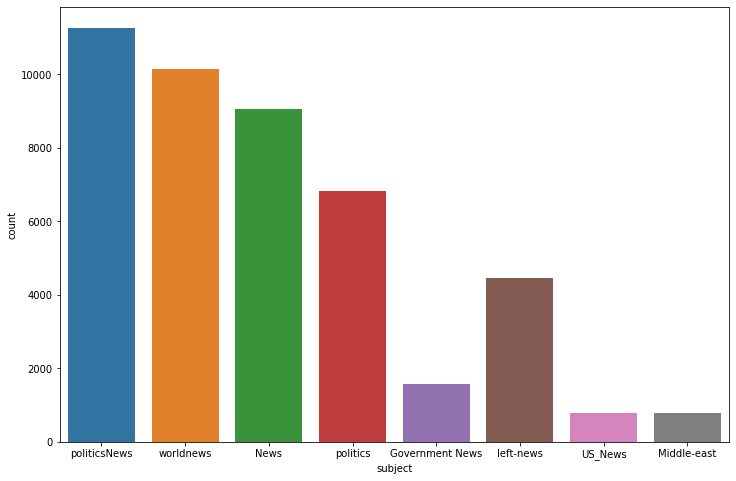

In [13]:
#plot counts, add figsize to be able to see data clearly, small size is not clear
plt.figure(figsize = (12,8))
sns.countplot(x = 'subject', data = df_final)

<AxesSubplot:xlabel='subject', ylabel='count'>

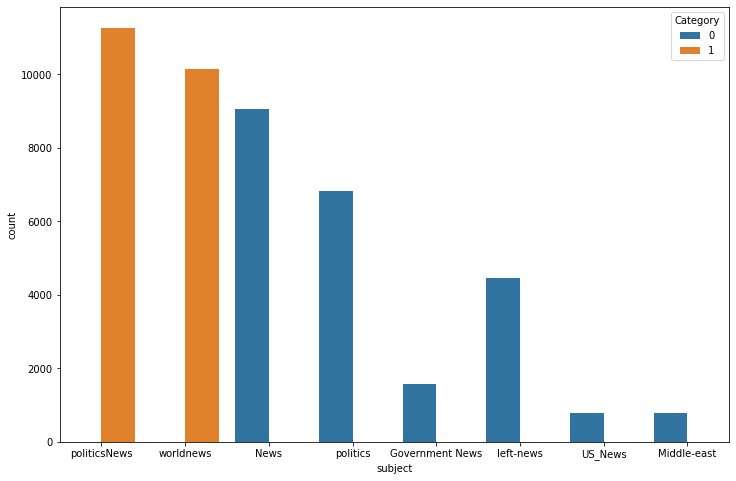

In [14]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'subject', hue = 'Category', data = df_final)

In [15]:
#drop date and subject column
df_final = df_final.drop(columns = ['subject','date'])

In [16]:
#combine the text and title column
df_final["newstext"] = df_final["title"].astype(str) + df_final["text"].astype(str)

In [17]:
df_final = df_final.drop(columns = ['title','text'])

In [18]:
df_final.sample(10)

,Category,newstext
11620,1,British PM May says Russia trying to weaponize...
8196,0,Cliven Bundy Was Just ARRESTED As He Tried To...
15558,0,THE ULTIMATE COMMUNITY ORGANIZER: IS YOUR NEIG...
1901,0,"Trump HUMILIATED, Gets Booed After Telling Co..."
7226,1,Congressional panel calls for U.S. women's his...
11033,0,POPULAR YOUTUBE PERSONALITY Goes Undercover Wi...
14825,0,HELL FREEZES OVER…Or Does It? [Video] Hundreds...
8182,1,McCain vows to block proposed separation of NS...
16324,0,FLASHBACK 2015: ANTI-GUN OBSESSED White House ...
2826,0,The United States Government Has Told Trump T...


In [19]:
stopwrd = set(stopwords.words('english'))

import string
punctuation = list(string.punctuation)
stopwrd.update(punctuation)

len(stopwrd)

211

In [20]:
def removespecialchar(txt):
    cleantxt = re.sub('[^a-zA-Z0-9 \n\.]', '', txt)
    return cleantxt

In [21]:
def removestopword(txt):
    token = word_tokenize(txt)
    filtered_words = [word for word in token if word.lower() not in stopwrd]
    joinedwrds = ' '.join(filtered_words)
    return joinedwrds

In [22]:
df_final['newstext']=df_final['newstext'].apply(removespecialchar)

In [23]:
df_final['newstext']=df_final['newstext'].apply(removestopword)

In [24]:
df_final.sample(50)

,Category,newstext
3789,1,Trump says process finding new FBI chief movin...
12603,1,China Taiwan spar Chinese diplomats invasion t...
6908,1,Trump meets former Vice President Gore New Yor...
4566,0,Montel Williams DESTROYS ProTrump Pastor INSAN...
6123,1,Glad see Obama go Gulf Arabs expect Trump coun...
17393,0,SHOCKING VIDEOTAPED INTERVIEW BARACK HUSSEIN O...
17709,1,Guatemala Supreme Court probe presidents salar...
9636,0,STEVE BANNON Calls Globalist George W. Bush Sl...
20655,1,Children teenagers among wounded Rohingya cram...
12109,0,COLLEGE STUDENTS ASKED SIGN Petition Canceling...


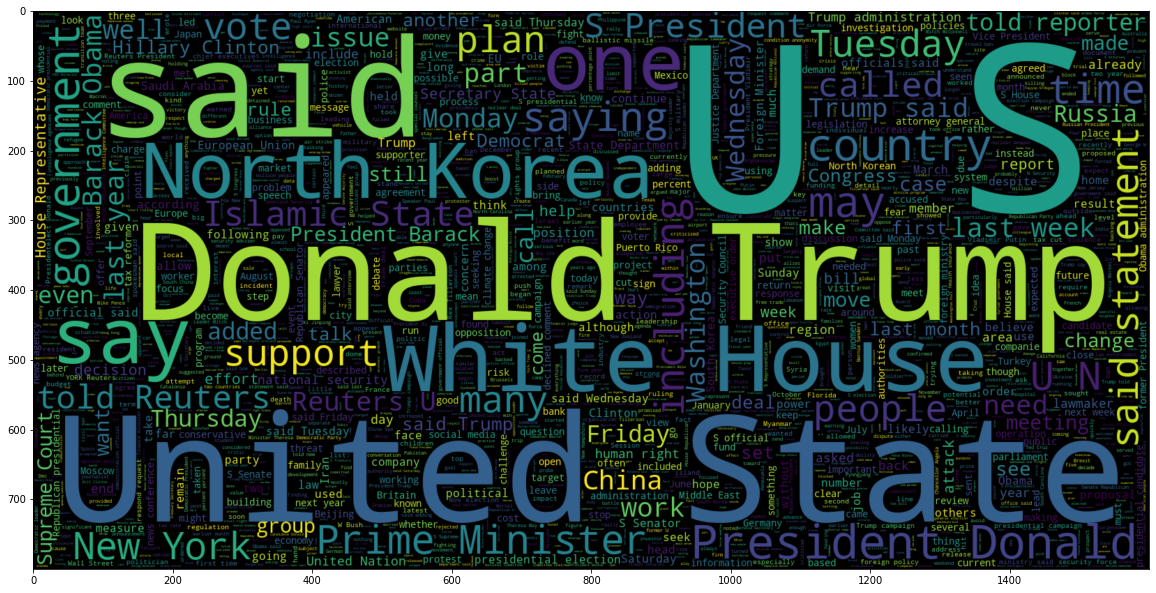

In [25]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_final[df_final.Category == 1].newstext))
plt.imshow(wc , interpolation = 'bilinear')

In [25]:
## now we will print wordcloud for only part of speech

def createpluralnoun(txt):
    sent_text = nltk.sent_tokenize(txt)
    tag_apn =[]
    for sentence in sent_text:
        tokenized_text = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(tokenized_text)
        #tag_apn.append(tagged)
        tag_apn = tag_apn + tagged
    results = [t[0] for t in tag_apn if t[1] == 'NNS']
    joinednonwrds = ' '.join(results)
    return joinednonwrds

In [26]:
df_final['pluralnouns']=df_final['newstext'].apply(createpluralnoun)

In [27]:
df_final.head()

,Category,newstext,pluralnouns
0,1,U.S. budget fight looms Republicans flip fisca...,cuts lawmakers holidays lawmakers issues campa...
1,1,U.S. military accept transgender recruits Mond...,recruits people courts rulings appeals courts ...
2,1,Senior U.S. Republican senator Let Mr. Mueller...,links calls allies lawmakers forces committees...
3,1,FBI Russia probe helped Australian diplomat ti...,months officials counterparts emails officials...
4,1,Trump wants Postal Service charge much Amazon ...,packages billions dollars others packages pres...


In [31]:
##lot of duplicates in wordcloud, need to remove them
dupcheck = " ".join(df_final[df_final.Category == 1].pluralnouns)

In [46]:
##validation code only
word_list = dupcheck.split()
number_of_words = len(word_list)
number_of_words

##525800
## 9268

530072

In [34]:
## remove duplicates from list of word for wordcloud
duprem = (' '.join(dict.fromkeys(dupcheck.lower().split())))


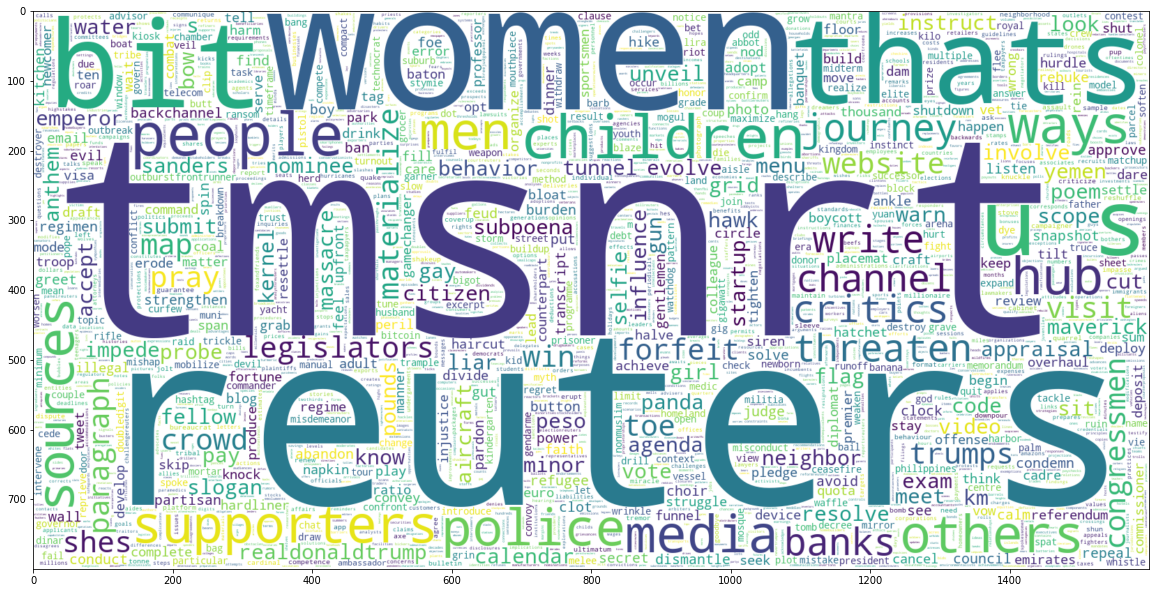

In [36]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS, background_color = 'white').generate(duprem)
plt.imshow(wc , interpolation = 'bilinear')

In [28]:
## now display wordcloud with least occuring words
## use counter of copllections to give you occurences of words in a list
import collections

def leastoccuringwords(txt):
    listword = txt.lower().split()
    occurrences = collections.Counter(listword)
    ##keys = occurrences.keys()
    ##values = occurrences.values()
    ##items = occurrences.items()
    lst = []
    for k,v in occurrences.items():
        if v > 2:
            lst.append(k)
    leastwordstr = ' '.join(lst)
    return leastwordstr

In [29]:
df_final['leastwords']=df_final['pluralnouns'].apply(leastoccuringwords)

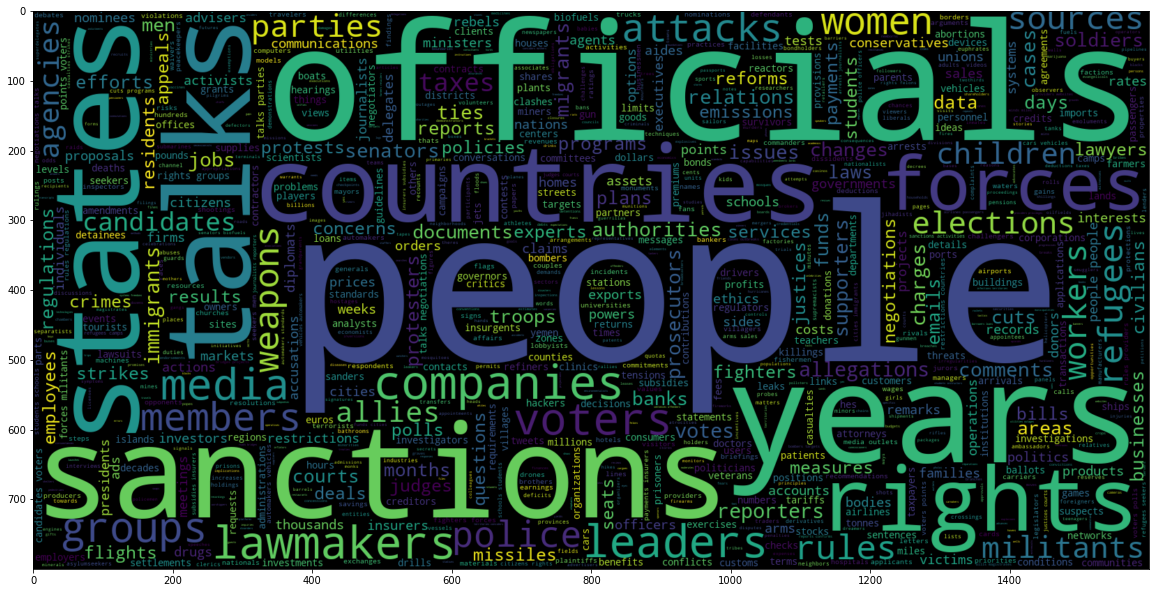

In [50]:
plt.figure(figsize = (20,20)) # Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_final[df_final.Category == 1].leastwords))
plt.imshow(wc , interpolation = 'bilinear')

In [30]:
df_final

,Category,newstext,pluralnouns,leastwords
0,1,U.S. budget fight looms Republicans flip fisca...,cuts lawmakers holidays lawmakers issues campa...,cuts programs years
1,1,U.S. military accept transgender recruits Mond...,recruits people courts rulings appeals courts ...,recruits rulings judges presidents applicants
2,1,Senior U.S. Republican senator Let Mr. Mueller...,links calls allies lawmakers forces committees...,links allies
3,1,FBI Russia probe helped Australian diplomat ti...,months officials counterparts emails officials...,officials
4,1,Trump wants Postal Service charge much Amazon ...,packages billions dollars others packages pres...,packages expenses prices costs
...,...,...,...,...
23476,0,McPain John McCain Furious Iran Treated US Sai...,vessels waters hours archneocons hours sailors...,vessels waters sailors
23477,0,JUSTICE Yahoo Settles Email Privacy Classactio...,tribes lawyers lawsuits scans ads cases rights...,lawyers users
23478,0,Sunnistan US Allied Safe Zone Plan Take Territ...,rebels officials fighters allies hordes terror...,rebels officials fighters terrorists people in...
23479,0,Blow 700 Million Al Jazeera America Finally Ca...,failures media allies media exhibitions media ...,media


In [31]:
df_final.to_csv('PowerBIWordcloudInput.csv')